In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
df=pd.read_csv("empsal.csv")
df

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$81000.00,$73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$74628.00,$74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,$77280.00,$70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$96276.00,$96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,$84032.00,$76627.00
...,...,...,...,...,...
34213,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,$74628.00,$74628.00
34214,"ZYNIEWICZ, ROBERT J",CONSTRUCTION LABORER,WATER MGMNT,$73216.00,$66764.00
34215,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,$77238.00,$77238.00
34216,"ZYSKO, RICHARD",LIEUTENANT,FIRE,$101958.00,$101958.00


In [33]:
df.DEPARTMENT.unique()

array(['WATER MGMNT', 'POLICE', 'FLEET MANAGEMNT', 'FIRE',
       'FAMILY & SUPPORT', 'TRANSPORTN', 'STREETS & SAN', 'REVENUE',
       'BUSINESS AFFAIRS', 'COMMUNITY DEVELOPMENT', 'OEMC', 'HEALTH',
       'ENVIRONMENT', 'GENERAL SERVICES', 'AVIATION', 'LAW',
       'PUBLIC LIBRARY', 'ADMIN HEARNG', 'CULTURAL AFFAIRS', 'BUILDINGS',
       'FINANCE', 'CITY COUNCIL', 'ANIMAL CONTRL', 'CITY CLERK',
       'BOARD OF ELECTION', 'COMPLIANCE', 'HUMAN RESOURCES', 'TREASURER',
       'DISABILITIES', 'IPRA', "MAYOR'S OFFICE", 'DoIT', 'PROCUREMENT',
       'HUMAN RELATIONS', 'INSPECTOR GEN', 'BOARD OF ETHICS',
       'BUDGET & MGMT', 'POLICE BOARD', 'LICENSE APPL COMM'], dtype=object)

In [34]:
df.DEPARTMENT.value_counts()

POLICE                   14147
FIRE                      5085
STREETS & SAN             2193
WATER MGMNT               1834
OEMC                      1381
AVIATION                  1289
TRANSPORTN                1230
PUBLIC LIBRARY            1063
FAMILY & SUPPORT           863
HEALTH                     862
FLEET MANAGEMNT            612
GENERAL SERVICES           477
LAW                        413
REVENUE                    411
CITY COUNCIL               364
BUILDINGS                  291
COMMUNITY DEVELOPMENT      236
BUSINESS AFFAIRS           191
FINANCE                    190
CITY CLERK                 127
BOARD OF ELECTION          114
DoIT                        95
IPRA                        87
HUMAN RESOURCES             73
MAYOR'S OFFICE              73
ANIMAL CONTRL               66
CULTURAL AFFAIRS            65
ENVIRONMENT                 61
PROCUREMENT                 59
INSPECTOR GEN               54
BUDGET & MGMT               50
ADMIN HEARNG                40
DISABILI

In [35]:
df.isnull().sum()

NAME                                       0
JOB TITLE                                  0
DEPARTMENT                                 0
EMPLOYEE ANNUAL SALARY                     0
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    0
dtype: int64

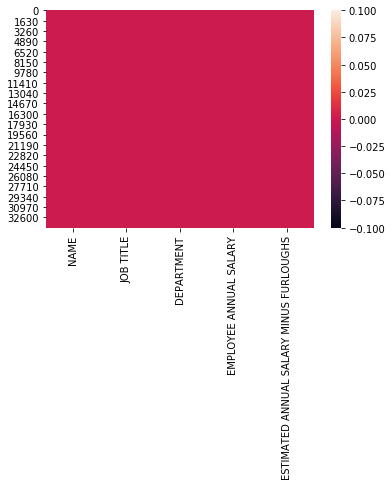

In [36]:
sns.heatmap(df.isnull())

In [37]:
df=df.drop(columns=['NAME'],axis=1)

In [38]:
df.dtypes

JOB TITLE                                  object
DEPARTMENT                                 object
EMPLOYEE ANNUAL SALARY                     object
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    object
dtype: object

In [39]:
df['JOB TITLE'] = df['JOB TITLE'].astype('category').cat.codes
df['DEPARTMENT'] = df['DEPARTMENT'].astype('category').cat.codes
df.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,1115,38,$81000.00,$73862.00
1,783,30,$74628.00,$74628.00
2,193,19,$77280.00,$70174.00
3,240,38,$96276.00,$96276.00
4,451,38,$84032.00,$76627.00


In [40]:
cd=df.drop(columns=['JOB TITLE','DEPARTMENT'],axis=1)
cd.head()

,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,$81000.00,$73862.00
1,$74628.00,$74628.00
2,$77280.00,$70174.00
3,$96276.00,$96276.00
4,$84032.00,$76627.00


In [41]:
colstocheck=cd.columns
df[colstocheck] = df[colstocheck].replace({'\$':''}, regex = True)
df.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,1115,38,81000.00,73862.00
1,783,30,74628.00,74628.00
2,193,19,77280.00,70174.00
3,240,38,96276.00,96276.00
4,451,38,84032.00,76627.00


In [42]:
df.dtypes

JOB TITLE                                   int16
DEPARTMENT                                   int8
EMPLOYEE ANNUAL SALARY                     object
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    object
dtype: object

In [43]:
df[colstocheck]=df[colstocheck].astype(dtype='float32')
df[colstocheck]=df[colstocheck].astype(dtype='int32')

In [44]:
df.dtypes

JOB TITLE                                  int16
DEPARTMENT                                  int8
EMPLOYEE ANNUAL SALARY                     int32
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    int32
dtype: object

In [45]:
df.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,1115,38,81000,73862
1,783,30,74628,74628
2,193,19,77280,70174
3,240,38,96276,96276
4,451,38,84032,76627


In [46]:
df.describe()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
count,34218.000000,34218.000000,34218.000000,34218.000000
mean,654.629464,26.016921,73828.763341,72032.171518
std,254.375928,8.912667,22778.636848,22109.779752
min,0.000000,0.000000,1.000000,1.000000
25%,526.000000,18.000000,67224.000000,64248.000000
50%,783.000000,30.000000,77238.000000,76627.000000
75%,783.000000,30.000000,84032.000000,82878.000000
max,1123.000000,38.000000,260004.000000,236096.000000


In [47]:
df.corr()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
JOB TITLE,1.000000,0.254697,-0.042467,-0.008930
DEPARTMENT,0.254697,1.000000,-0.020931,-0.012801
EMPLOYEE ANNUAL SALARY,-0.042467,-0.020931,1.000000,0.990208
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,-0.008930,-0.012801,0.990208,1.000000


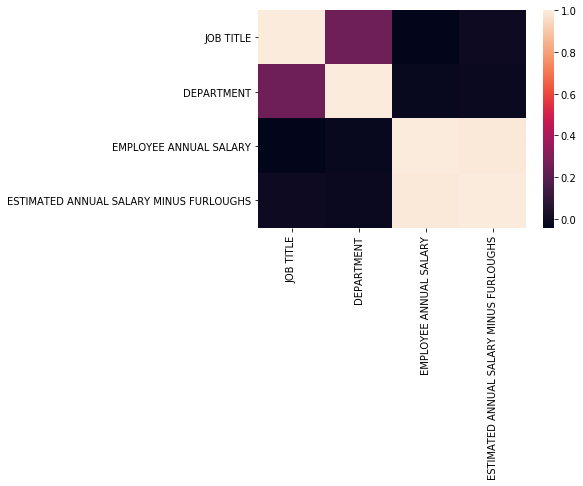

In [48]:
sns.heatmap(df.corr())

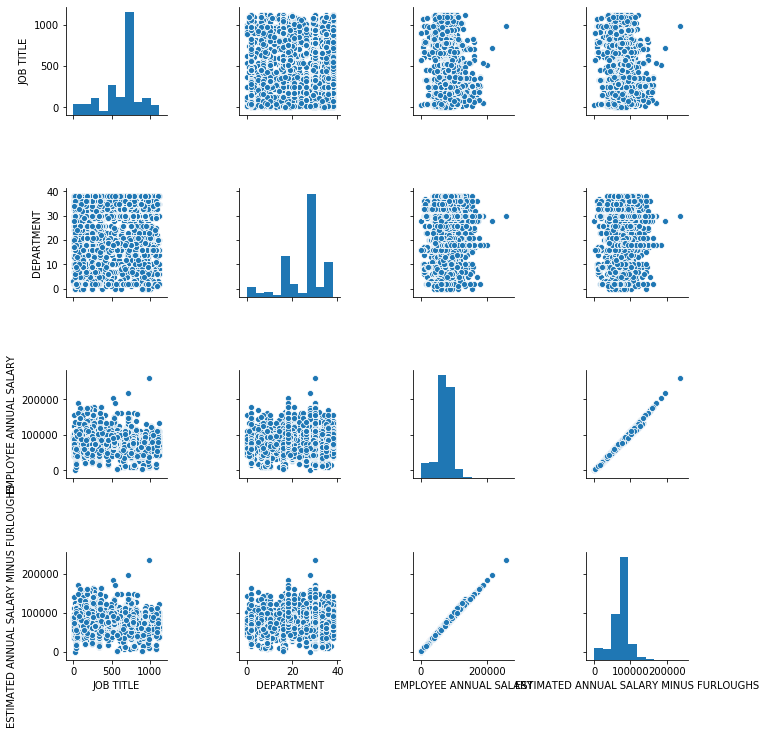

In [49]:
sns.pairplot(df)

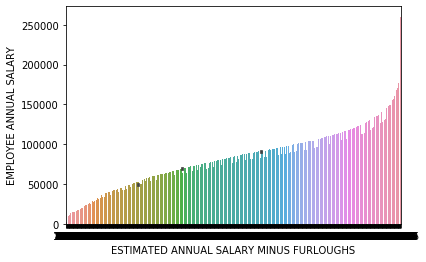

In [50]:
sns.barplot(x='ESTIMATED ANNUAL SALARY MINUS FURLOUGHS',y='EMPLOYEE ANNUAL SALARY',data=df) # to check impact on target
plt.show()

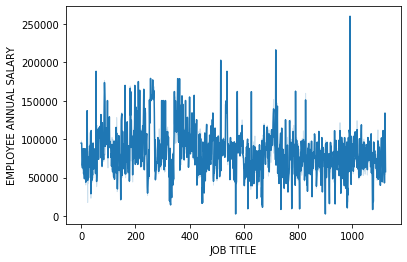

In [51]:
sns.lineplot(x='JOB TITLE',y='EMPLOYEE ANNUAL SALARY',data=df) # to check impact on target
plt.show()

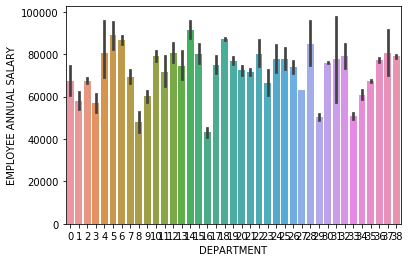

In [52]:
sns.barplot(x='DEPARTMENT',y='EMPLOYEE ANNUAL SALARY',data=df) # to check impact on target
plt.show()

In [53]:
y=df['EMPLOYEE ANNUAL SALARY']

In [54]:
df.skew()

JOB TITLE                                 -0.869632
DEPARTMENT                                -1.065106
EMPLOYEE ANNUAL SALARY                    -0.571787
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS   -0.686903
dtype: float64

In [55]:
# handling skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
d=pt.fit_transform(df)
d=pd.DataFrame(d,columns=df.columns)
df=d

In [56]:
df.skew()

JOB TITLE                                 -0.469584
DEPARTMENT                                -0.455396
EMPLOYEE ANNUAL SALARY                     0.165752
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    0.076655
dtype: float64

In [57]:
df.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,2.141158,1.663606,0.275224,0.014848
1,0.478737,0.392256,-0.023846,0.052150
2,-1.753336,-0.972498,0.099617,-0.162502
3,-1.622724,1.663606,1.024380,1.168434
4,-0.918671,1.663606,0.420395,0.150236


In [58]:
x=df.drop(columns=['EMPLOYEE ANNUAL SALARY'], axis=1)
x.head()

,JOB TITLE,DEPARTMENT,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,2.141158,1.663606,0.014848
1,0.478737,0.392256,0.052150
2,-1.753336,-0.972498,-0.162502
3,-1.622724,1.663606,1.168434
4,-0.918671,1.663606,0.150236


In [69]:
y=df['EMPLOYEE ANNUAL SALARY']
y.head()

0    0.275224
1   -0.023846
2    0.099617
3    1.024380
4    0.420395
Name: EMPLOYEE ANNUAL SALARY, dtype: float64

In [70]:
from sklearn import linear_model
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [71]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(22926, 3) (11292, 3)
(22926,) (11292,)


In [72]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  59  is  0.9783791108169083


In [63]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.9650394957458343

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=59)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [74]:
print("error:")
print("r2 score is: ",r2_score(y_test,y_pred))
print("root Mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

error:
r2 score is:  0.9783791108169083
root Mean squared error:  0.15127154488695221


In [75]:
from sklearn.externals import joblib

In [76]:
joblib.dump(lreg,'empsal.pkl')

['empsal.pkl']

In [77]:
model=joblib.load('empsal.pkl')

In [78]:
model.predict(x_test.head())

array([-0.81491503, -1.01916502, -0.14869662,  0.03990835, -0.11422838])

In [79]:
y_test.head()

30000   -0.612264
962     -1.151730
33374   -0.217245
19592   -0.023846
31673    0.100179
Name: EMPLOYEE ANNUAL SALARY, dtype: float64